# Metody statystyczne zestaw 2
## Autor Paweł Jelonek

### Symulacja procesu Markova
 - $2$ użytkowników
 - $1$ komputer

#### Do komputera zalogowanych może być:
 - $x = 0$(użytkowników)
 - $x = 1$(użytkowników)
 - $x = 2$(użytkowników)

Prawdopodonbieństwo logowania $Plogowania = 0.2$<br>
Prawdopodonbieństwo pozostania niezalogowanym $1 - Plogowania = 0.8$<br>
Prawdopodonbieństwo wylogowania $Pwylogowania = 0.5$<br>
Prawdopodonbieństwo pozostania zalogowanym $1-Pwylogowania = 0.5$<br>



Macierz Przejść $= \left[\begin{array}{ccc}
0.64 & 0.32 & 0.4\\
0.4 & 0.5 & 0.1\\
0.25 & 0.5 & 0.25\\
\end{array}\right]$

In [53]:
from numpy import subtract, random, arange, matrix, subtract, abs
from numpy.linalg import matrix_power, det, solve
from matplotlib import pyplot as plt

### Problem A
### Policzyć $[P]^N$ dla dużych $N$

In [86]:
P = [[0.64, 0.32, 0.04],
            [0.40, 0.50, 0.10],
            [0.25, 0.50, 0.25]]

In [ ]:
T = matrix([[0.5, 0, 0.5],
            [0, 0.25, 0.75],
            [0.5, 0.5, 0]])

In [66]:
power = 100
print(matrix_power(P, power))

[[0.51020408 0.40816327 0.08163265]
 [0.51020408 0.40816327 0.08163265]
 [0.51020408 0.40816327 0.08163265]]


### Kryterium zbieżności $|P^N - P^{N-1}| < 10^{-5}$

In [89]:
def convergence_of_P(N, P):
    y= []
    for n in range(2, N):
        prev_P = matrix_power(P, n-1)
        current_p = matrix_power(P, n)
        y.append(subtract(current_p, prev_P))
    return y

In [90]:
print(convergence_of_P(3, T))

[matrix([[ 0.    ,  0.25  , -0.25  ],
        [ 0.375 ,  0.1875, -0.5625],
        [-0.25  , -0.375 ,  0.625 ]])]


### Można narysować wykres gdzie:
### $y = [P^n]ij$
### $x = n$

In [ ]:
def markov_chain(N, T):
    y = []
    for n in range(1, N):
        tn = matrix_power(T, n)
        y.append(tn[1, 1])
    return y

In [ ]:
N = 50
y = markov_chain(N, P)

plt.grid()
plt.title("y = [P^N]ij")
plt.xlabel('n')
plt.ylabel('[P^N]ij')
plt.rcParams["figure.figsize"]=(20, 10)
plt.plot(range(1, N), y)

### Problem B

### Start z wybranego węzła $x=0,1,2$
### Losowanie kolejnego węzła zgodnie z $P$
### Przejście do nowego węzła

### Losowanie dla $~N=10^4$
### Policzenie $\pi^{exp}_{i} = N^{i}/N, N^{i}$ - ile razy odwiedzone $x = (0,1,2)$
### Porównanie z $[P]^{N}$, start z $x=(0,1,2)$, zbieżność

[[0.4955045  0.42557443 0.07892108]]
[[0.59072581 0.36693548 0.04233871]
 [0.42117647 0.48470588 0.09411765]
 [0.29113924 0.48101266 0.2278481 ]]


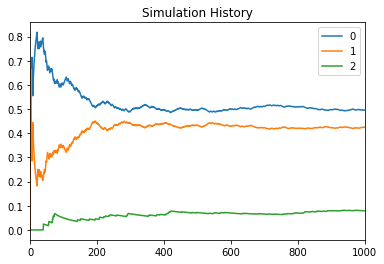

In [22]:
import numpy as np
import pandas as pd
from random import seed
from random import random
import matplotlib.pyplot as plt
stateChangeHist= np.array([[0.0,  0.0,  0.0],

                            [0.0, 0.0,  0.0],

                            [0.0, 0.0,  0.0]])

state=np.array([[1.0, 0.0, 0.0]])
currentState=0
stateHist=state
dfStateHist=pd.DataFrame(state)


distr_hist = [[0,0,0]]



# Simulate from multinomial distribution

def simulate_multinomial(vmultinomial):

    r=np.random.uniform(0.0, 1.0)

    CS=np.cumsum(vmultinomial)

    CS=np.insert(CS,0,0)

    m=(np.where(CS<r))[0]

    nextState=m[len(m)-1]

    return nextState




for x in range(1000):
    currentRow=np.ma.masked_values((P[currentState]), 0.0)
    nextState=simulate_multinomial(currentRow)
    # Keep track of state changes
    stateChangeHist[currentState,nextState]+=1
    # Keep track of the state vector itself
    state=np.array([[0,0,0]])
    state[0,nextState]=1.0
    # Keep track of state history
    stateHist=np.append(stateHist,state,axis=0)
    currentState=nextState
    # calculate the actual distribution over the 3 states so far
    totals=np.sum(stateHist,axis=0)
    gt=np.sum(totals)
    distrib=totals/gt
    distrib=np.reshape(distrib,(1,3))
    distr_hist=np.append(distr_hist,distrib,axis=0)
    
print(distrib)

P_hat=stateChangeHist/stateChangeHist.sum(axis=1)[:,None]
# Check estimated state transition probabilities based on history so far:
print(P_hat)

dfDistrHist = pd.DataFrame(distr_hist)
# Plot the distribution as the simulation progresses over time
# dfDistrHist.plot(title="Simulation History")
plt.show()